In [1]:
#Download this python library to get dataset
!pip install --upgrade --no-cache-dir git+https://github.com/StreamAlpha/tvdatafeed.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/StreamAlpha/tvdatafeed.git to /tmp/pip-req-build-kv9hw8zf
  Running command git clone --filter=blob:none --quiet https://github.com/StreamAlpha/tvdatafeed.git /tmp/pip-req-build-kv9hw8zf
  Resolved https://github.com/StreamAlpha/tvdatafeed.git to commit a7034f04509b67224618917c29272796e4fff858
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 64.7 MB/s eta 0:00:00
  Created wheel for tvdatafeed: filename=tvdatafeed-2.1.0-py3-none-any.whl size=7570 sha256=59632c8d8d67df12fa46b23e662e38c1897711c6b0c06e20468536105ead6c30
  Stored in directory: /tmp/pip-ephem-wheel-cache-0obaxo_u/wheels/61/5f/7d/953ab2e3eaea9db6badc898aec3ff220779870e60932341e72
Successfully built tvdatafeed


#Import librarys

In [2]:
from tvDatafeed import TvDatafeed, Interval
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns
#create an account on with https://www.tradingview.com/ 
username = '**********'
password = '***********'

tv = TvDatafeed(username, password) #username, password

##Get DATA

In [3]:
#This line of code appears to be using the TvDatafeed object tv to retrieve historical data for the stock symbol 'NVDA' on the NASDAQ exchange.
NVIDIA = tv.get_hist(symbol='NVDA', exchange='NASDAQ', interval=Interval.in_daily, n_bars=600)

In [4]:
#The given line of code is saving the historical stock price data stored in the Pandas DataFrame NVIDIA to a CSV file named "nvideDataset.csv".
NVIDIA.to_csv("nvideDataset.csv")

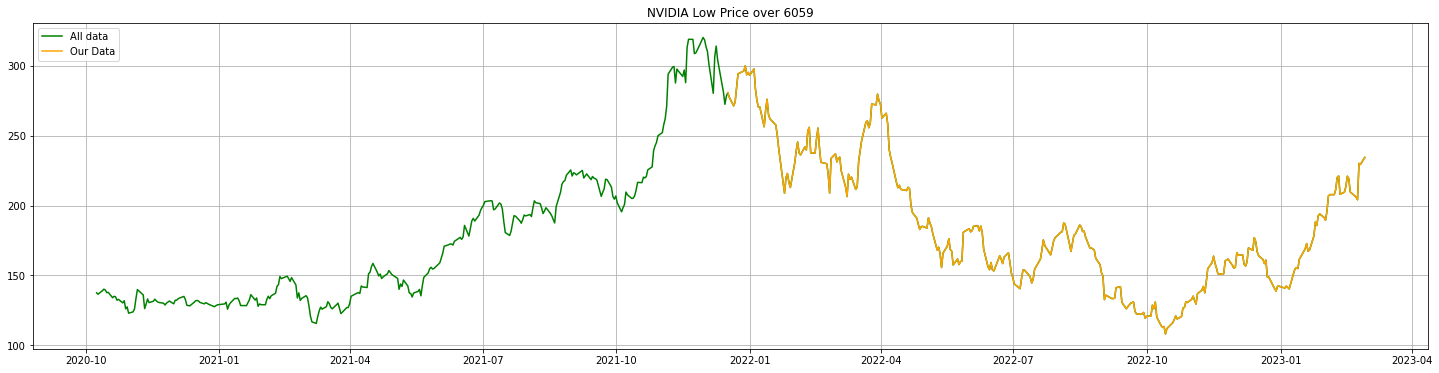

In [8]:
#The given code is plotting a line chart of the low price of NVIDIA stock over time using the Matplotlib library.
plt.figure(figsize=(25, 6))
plt.grid(True, which='both')
plt.plot(NVIDIA.index, NVIDIA['low'], color="green")
plt.plot(NVIDIA.tail(300).index, NVIDIA.tail(300)['low'], color="orange")
plt.legend(["All data", "Our Data"], loc="upper left")
plt.title('NVIDIA Low Price over 6059')
plt.savefig('invedia_history.png', transparent=True)

In [9]:
#The given line of code is using the tail() method on the Pandas DataFrame NVIDIA to display the last five rows of data.
NVIDIA.tail()

,symbol,open,high,low,close,volume
datetime,,,,,,
2023-02-21 14:30:00,NASDAQ:NVDA,210.00,214.9380,206.18,206.55,41001455.0
2023-02-22 14:30:00,NASDAQ:NVDA,207.07,211.0400,204.21,207.54,51318432.0
2023-02-23 14:30:00,NASDAQ:NVDA,234.40,238.8800,230.25,236.64,111799541.0
2023-02-24 14:30:00,NASDAQ:NVDA,232.25,234.7400,229.47,232.86,58971591.0
2023-02-27 14:30:00,NASDAQ:NVDA,236.70,238.7994,234.54,237.58,31206529.0


In [10]:
#The given line of code is dropping the 'symbol' column from the Pandas DataFrame NVIDIA.
NVIDIA = NVIDIA.drop('symbol', axis=1)

In [11]:
#The given line of code is resetting the index of the Pandas DataFrame NVIDIA after dropping the 'symbol' column.
NVIDIA = NVIDIA.reset_index(drop=True)

In [12]:
#The given line of code is writing the contents of the Pandas DataFrame NVIDIA to a CSV file named 'data.csv' without including the index column.
NVIDIA.to_csv('data.csv', index=False)

In [13]:
def add_target(dataFrame):
  """
  Function Name: add_target()

    Function Description:
    This function takes a Pandas DataFrame as input and adds a new column to it called "target" which contains binary values (0 or 1) based on whether the "low" value of the current row is higher than the previous row or not. The function also normalizes the input DataFrame by subtracting the mean and dividing by the standard deviation.

    Parameters:

    dataFrame: A Pandas DataFrame containing financial data for a stock.
    Returns:

    A modified Pandas DataFrame with an additional column "target" added.
  """
  target = [1]
  dataFrame = (dataFrame - np.mean(dataFrame)) / np.std(dataFrame)
  for i in range(len(dataFrame)-1):
    if dataFrame.iloc[i+1]["low"] > dataFrame.iloc[i]["low"]:
      target.append(1)
    else:
      target.append(0)
  dataFrame["target"] = np.array(target)
  return dataFrame

In [14]:
#Calls the add_target() function with NVIDIA DataFrame as input and assigns the resulting modified DataFrame to Data.
Data = add_target(NVIDIA)
#Drops the first row of the Data DataFrame.
Data = Data.drop(0)
#Writes the contents of the Data DataFrame to a CSV file named "Data.csv" without including the index column.
Data.to_csv("Data.csv", index=False)


In [15]:
#display data
Data

,open,high,low,close,volume,target
1,-0.908553,-0.946960,-0.881743,-0.914962,-0.527754,0
2,-0.865924,-0.849281,-0.831850,-0.825818,-0.031590,1
3,-0.807105,-0.849001,-0.810817,-0.821536,-0.540674,1
4,-0.808254,-0.850075,-0.822436,-0.850978,-0.924467,0
5,-0.900185,-0.913045,-0.860537,-0.875080,-0.977680,0
...,...,...,...,...,...,...
595,0.477238,0.486134,0.497096,0.411329,-0.171252,0
596,0.421102,0.413298,0.458053,0.430379,0.411416,0
597,0.944725,0.933503,0.974133,0.990357,3.827189,1
598,0.903533,0.856145,0.958674,0.917618,0.843641,0


In [16]:
#This code counts the occurrence of binary values in the "target" column of the Data DataFrame by calling the value_counts() method. The output displays the frequency of the values 1 and 0 in the column.
Data["target"].value_counts()

1    314
0    285
Name: target, dtype: int64

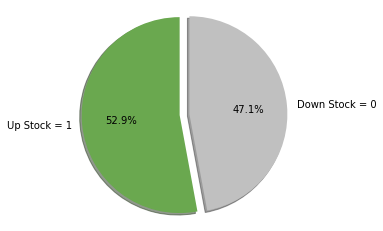

In [17]:
#This code generates a pie chart visualization to display the frequency of binary values in the "target" column of a dataset. The chart shows the percentage of "Up Stock" (1) and "Down Stock" (0) values in the dataset using different colors and labels. 
labels = 'Up Stock = 1', 'Down Stock = 0',
sizes = [291, 259] 
explode = (0, 0.1)
colors = ['#6aa84fff', '#C0C0C0']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=colors)
ax1.axis('equal')
plt.savefig("circle_labels_stock.png", transparent=True)
plt.show()

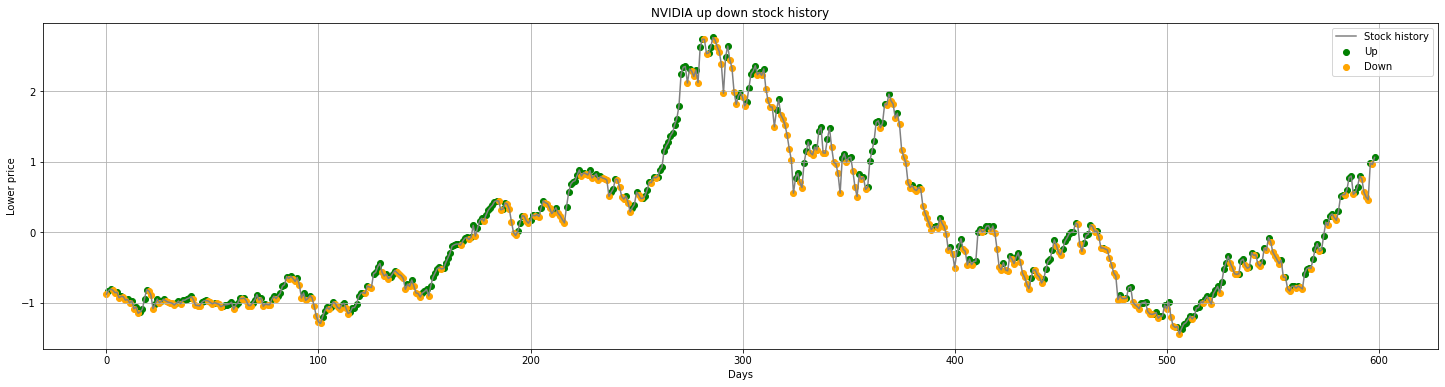

In [18]:
#This code creates a line plot and two scatter plots to visualize the historical stock prices of NVIDIA and the binary target labels indicating whether the stock price went up or down on a particular day.
days = [i for i in range(len(Data["low"]))]
plt.figure(figsize=(25, 6))
plt.grid(True, which='both')
plt.plot(days, Data["low"], color="grey")
high = [[Data.iloc[i]["low"], i] for i in range(len(Data["low"])) if Data.iloc[i]["target"] == 1]
high = np.array(high).T
plt.scatter(high[1], high[0], color="green")
low = [[Data.iloc[i]["low"], i] for i in range(len(Data["low"])) if Data.iloc[i]["target"] == 0]
low = np.array(low).T
plt.scatter(low[1], low[0], color="orange")
plt.legend(["Stock history", "Up", "Down"])
plt.title('NVIDIA up down stock history')
plt.xlabel('Days')
plt.ylabel('Lower price')
plt.savefig('Up-Down-NVIDIA-Stock.png', transparent=True)
plt.show()

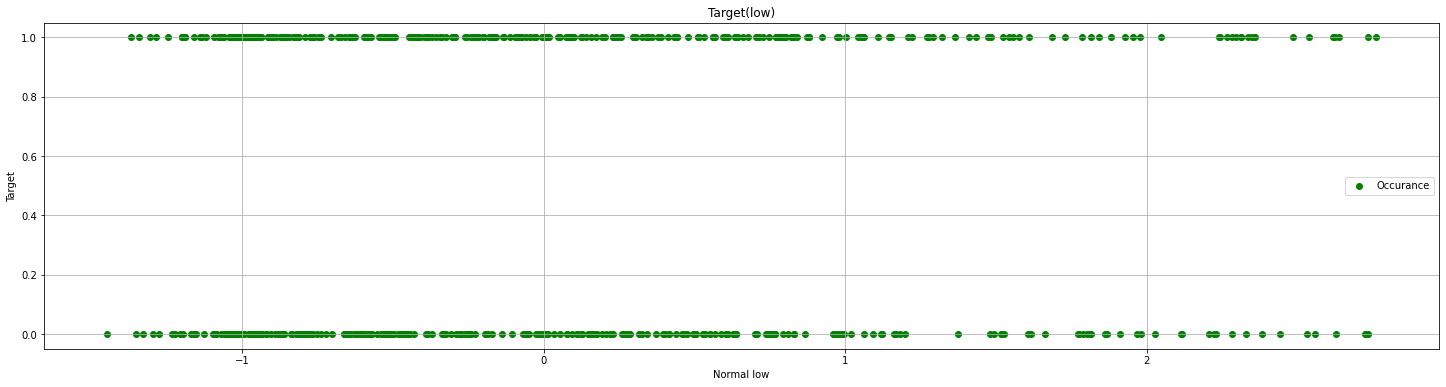

In [19]:
#This code creates a scatter plot to visualize the relationship between the "low" column of the Data DataFrame and the "target" column.
plt.figure(figsize=(25, 6))
plt.grid(True, which='both')
plt.scatter(Data["low"], Data["target"], color="green")
plt.legend(["Occurance"])
plt.title('Target(low)')
plt.xlabel('Normal low')
plt.ylabel('Target')
plt.savefig('target(low).png', transparent=True)
plt.show()

In [20]:
NVIDIA.describe()

,open,high,low,close,volume
count,600.000000,600.000000,600.000000,600.000000,6.000000e+02
mean,185.091024,188.921344,181.097892,185.174746,4.403372e+07
std,52.237536,53.562081,50.499412,52.009731,1.772120e+07
min,109.710000,117.350000,108.130000,112.270000,9.788352e+06
25%,139.971331,142.245000,137.232863,139.831250,2.941692e+07
50%,172.060000,176.920000,168.485000,172.430000,4.349530e+07
75%,217.302500,223.202050,212.855300,219.042500,5.553745e+07
max,335.170000,346.470000,320.360000,333.760000,1.178865e+08


In [118]:
#This code performs logistic regression analysis using the GLM (Generalized Linear Model) function from the statsmodels package in Python.
reg_log1 = smf.glm('target ~ open+low', data=Data.head(300), family=sm.families.Binomial()).fit()
beta1 = reg_log1.params[0]
beta2 = reg_log1.params[1]
print(reg_log1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 target   No. Observations:                  300
Model:                            GLM   Df Residuals:                      297
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -177.00
Date:                Mon, 27 Feb 2023   Deviance:                       354.00
Time:                        22:23:01   Pearson chi2:                 5.86e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0018      0.144      0.012      0.9

###for train data

AUC : 0.7821969696969697


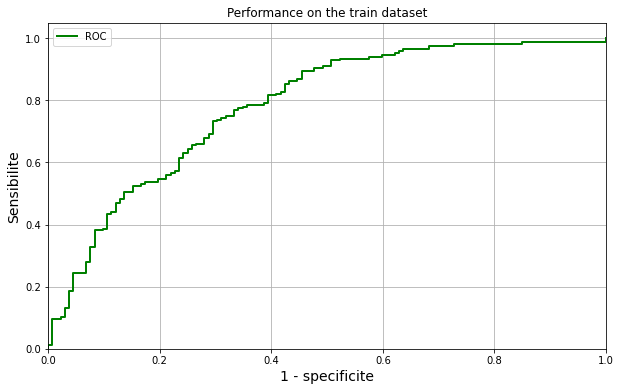

In [119]:
#This code uses the scikit-learn library to compute and plot a receiver operating characteristic (ROC) curve for a logistic regression model. 
from sklearn import metrics
y_true= Data.head(300)['target']
y_pred_proba= reg_log1.predict()
[fpr, tpr, thr] = metrics.roc_curve(y_true, y_pred_proba)
plt.figure(figsize=(10, 6))
plt.grid(True, which='both')
plt.plot(fpr, tpr, color='green', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - specificite', fontsize=14)
plt.ylabel('Sensibilite', fontsize=14)
print ("AUC :",metrics.auc(fpr, tpr))
plt.title('Performance on the train dataset')
plt.legend(['ROC'])
plt.savefig('ROC.png', transparent=True)
plt.show()

In [120]:
#This code computes and prints the sensitivity, specificity, and threshold for a logistic regression model at a specific operating point on the ROC curve where the true positive rate (sensitivity) is greater than 0.95.
idx = np.min(np.where(tpr > 0.95))
print ("Sensibilité : %.2f" % tpr[idx])
print ("Spécificité : %.2f" % (1-fpr[idx]))
print ("Seuil : %.2f" % thr[idx])

Sensibilité : 0.95
Spécificité : 0.38
Seuil : 0.42


In [121]:
#This code computes and prints several performance metrics for a binary classification model based on the predicted probabilities (y_pred_proba) and true labels (y_true) of a test dataset.
y_pred = (y_pred_proba > 0.50).astype(int)
print("la matrice de confusion :", metrics.confusion_matrix(y_true,y_pred))
print("la precision :", metrics.precision_score(y_true, y_pred))
print("le recall :", metrics.recall_score(y_true, y_pred))
print("le f1_score :", metrics.f1_score(y_true, y_pred))
print("l'accuracy :", metrics.accuracy_score(y_true, y_pred))

la matrice de confusion : [[ 73  59]
 [ 23 145]]
la precision : 0.7107843137254902
le recall : 0.8630952380952381
le f1_score : 0.7795698924731183
l'accuracy : 0.7266666666666667


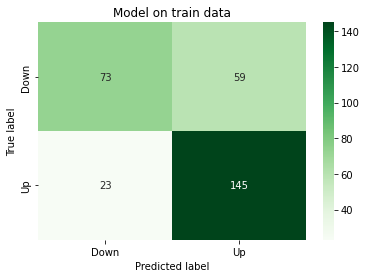

In [122]:
#This code computes and prints several performance metrics for a binary classification model based on the predicted probabilities (y_pred_proba) and true labels (y_true) of a test dataset.
from sklearn.metrics import confusion_matrix
from keras.models import load_model
import seaborn as sns


conf_matrix = confusion_matrix(y_true, y_pred)


sns.heatmap(conf_matrix, annot=True, cmap='Greens', fmt='d', xticklabels=['Down','Up'], yticklabels=['Down','Up'])
plt.title('Model on train data')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.savefig("model_confusion_matrix.png", transparent=True)
plt.show()

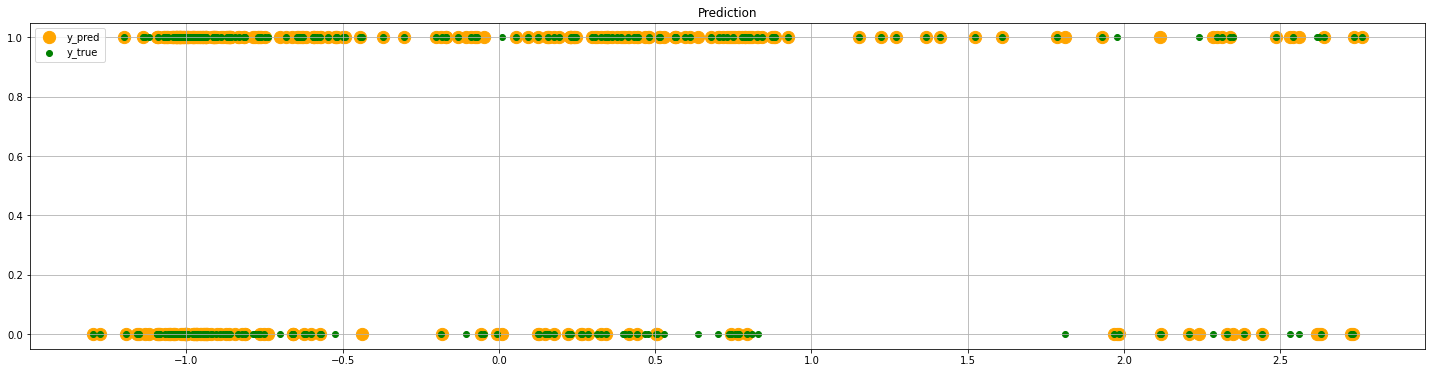

In [123]:
#This code generates a scatter plot to visualize the predicted and true values of a target variable for the last 300 instances in a dataset.
plt.figure(figsize=(25, 6))
plt.grid()
plt.scatter(Data.head(300)['low'], y_pred, color="orange", s=150)
plt.scatter(Data.head(300)['low'], y_true, color="green")
plt.legend(["y_pred", "y_true"])
plt.title("Prediction")
plt.savefig('prediction.png', transparent=True)

###for test data

AUC : 0.4825041127562135


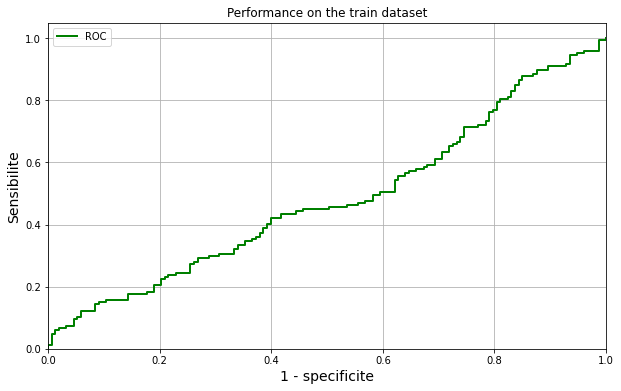

In [124]:
#This code uses the scikit-learn library to compute and plot a receiver operating characteristic (ROC) curve for a logistic regression model. 
from sklearn import metrics
y_true= Data.tail(300)['target']
y_pred_proba= reg_log1.predict()
[fpr, tpr, thr] = metrics.roc_curve(y_true, y_pred_proba)
plt.figure(figsize=(10, 6))
plt.grid(True, which='both')
plt.plot(fpr, tpr, color='green', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - specificite', fontsize=14)
plt.ylabel('Sensibilite', fontsize=14)
print ("AUC :",metrics.auc(fpr, tpr))
plt.title('Performance on the train dataset')
plt.legend(['ROC'])
plt.savefig('ROC.png', transparent=True)
plt.show()

In [125]:
#This code computes and prints the sensitivity, specificity, and threshold for a logistic regression model at a specific operating point on the ROC curve where the true positive rate (sensitivity) is greater than 0.95.
idx = np.min(np.where(tpr > 0.95))
print ("Sensibilité : %.2f" % tpr[idx])
print ("Spécificité : %.2f" % (1-fpr[idx]))
print ("Seuil : %.2f" % thr[idx])

Sensibilité : 0.95
Spécificité : 0.05
Seuil : 0.13


In [126]:
#This code computes and prints several performance metrics for a binary classification model based on the predicted probabilities (y_pred_proba) and true labels (y_true) of a test dataset.
y_pred = (y_pred_proba > 0.50).astype(int)
print("la matrice de confusion :", metrics.confusion_matrix(y_true,y_pred))
print("la precision :", metrics.precision_score(y_true, y_pred))
print("le recall :", metrics.recall_score(y_true, y_pred))
print("le f1_score :", metrics.f1_score(y_true, y_pred))
print("l'accuracy :", metrics.accuracy_score(y_true, y_pred))

la matrice de confusion : [[ 43 110]
 [ 53  94]]
la precision : 0.46078431372549017
le recall : 0.6394557823129252
le f1_score : 0.5356125356125356
l'accuracy : 0.45666666666666667


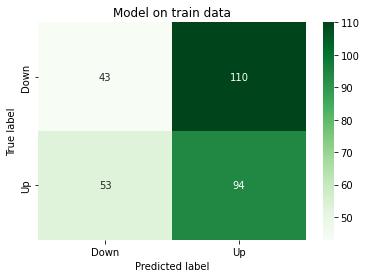

In [127]:
##This code computes and prints several performance metrics for a binary classification model based on the predicted probabilities (y_pred_proba) and true labels (y_true) of a test dataset.

from sklearn.metrics import confusion_matrix
from keras.models import load_model
import seaborn as sns


conf_matrix = confusion_matrix(y_true, y_pred)


sns.heatmap(conf_matrix, annot=True, cmap='Greens', fmt='d', xticklabels=['Down','Up'], yticklabels=['Down','Up'])
plt.title('Model on train data')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.savefig("model_confusion_matrix.png", transparent=True)
plt.show()

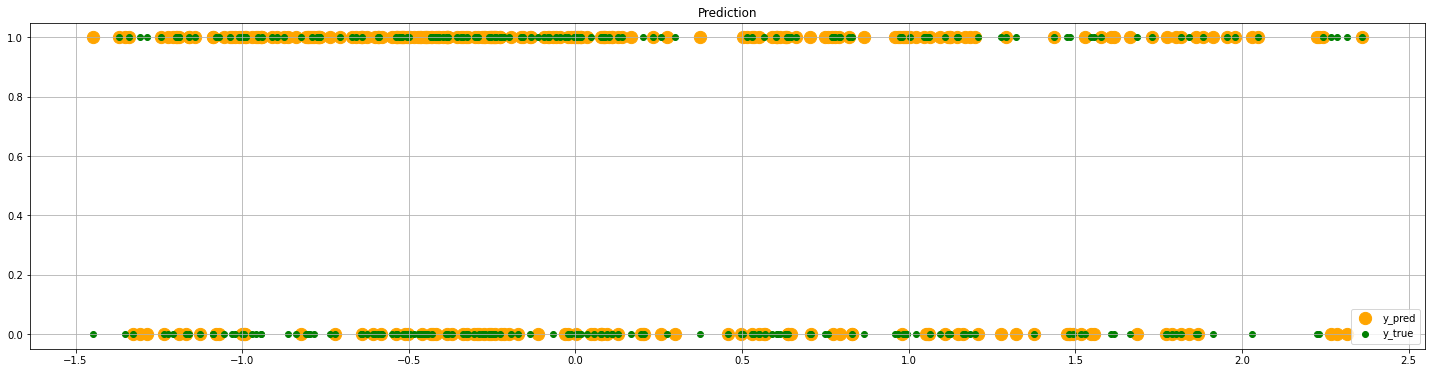

In [128]:
#This code generates a scatter plot to visualize the predicted and true values of a target variable for the last 300 instances in a dataset.
plt.figure(figsize=(25, 6))
plt.grid()
plt.scatter(Data.tail(300)['low'], y_pred, color="orange", s=150)
plt.scatter(Data.tail(300)['low'], y_true, color="green")
plt.legend(["y_pred", "y_true"])
plt.title("Prediction")
plt.savefig('prediction.png', transparent=True)

#PCA

In [129]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
  """
  Function Name: display_circles

  The display_circles function is used to create a scatter plot of the principal components and display a correlation circle. The correlation circle is used to visualize the correlation between the principal components and the original variables. This function takes the following parameters:

  pcs: a numpy array of the principal components.
  n_comp: an integer value indicating the number of principal components to use.
  pca: an instance of the PCA class from scikit-learn.
  axis_ranks: a list of tuples specifying the axes to use for each plot.
  labels: an optional list of labels for the original variables.
  label_rotation: an optional integer value specifying the rotation angle for the labels.
  lims: an optional list specifying the minimum and maximum values for the x and y axes.
  """
  for d1, d2 in axis_ranks:
    if d2 < n_comp:
      fig, ax = plt.subplots(figsize=(7,6))
      if lims is not None :
        xmin, xmax, ymin, ymax = lims
      elif pcs.shape[1] < 30 :
        xmin, xmax, ymin, ymax = -1, 1, -1, 1
      else :
        xmin, xmax, ymin, ymax = min(pcs[d1,:]),max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])
      if pcs.shape[1] < 30 :
        plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
        pcs[d1,:], pcs[d2,:],
        angles='xy', scale_units='xy', scale=1, color="grey")
      else:
        lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
        ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
        if labels is not None:
          for i,(x, y) in enumerate(pcs[[d1,d2]].T):
            if x >= xmin and x <= xmax and y >= ymin and y<= ymax :
              plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
        circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
        plt.gca().add_artist(circle)
        plt.ylim(ymin, ymax)
        plt.plot([-1, 1], [0, 0], color='grey', ls='--')
        plt.plot([0, 0], [-1, 1], color='grey', ls='--')
        plt.xlabel('F{} ({}%)'.format(d1+1,round(100*pca.explained_variance_ratio_[d1],1)))
        plt.ylabel('F{} ({}%)'.format(d2+1,round(100*pca.explained_variance_ratio_[d2],1)))
        plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
        plt.show(block=False)

def display_scree_plot(pca):
  """
  Function Name: display_scree_plot(pca)

  This function displays a scree plot, which is a graph that displays the explained variance of each principal component (or axis) of a Principal Component Analysis (PCA) model.

  Input:

  pca: an instance of the PCA class from the sklearn.decomposition module that has already been fitted on data.
  Output:

  A plot of the scree plot.
  """
  scree = pca.explained_variance_ratio_*100
  plt.grid(True, which='both')
  plt.bar(np.arange(len(scree))+1, scree, color="green")
  plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="orange",marker='o')
  plt.xlabel("Rank of the axis of inertia")
  plt.ylabel("Percentage of inertia")
  plt.title("Eigenvalue decay")
  plt.savefig("disply.png", transparent=True)
  plt.show(block=False)
  plt.show()

def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
  """
  Function Name: display_factorial_planes

  Description:
  This function takes in the following parameters:

  X_projected: a numpy array containing the projected data to display
  n_comp: an integer specifying the number of components to display
  pca: a PCA object
  axis_ranks: a list of two integers specifying the axis ranks to display
  labels: an optional list of labels for each point in the projection
  alpha: a float specifying the transparency of the points
  illustrative_var: an optional list of illustrative variables to display as different colors
  This function creates a scatter plot of the projected data onto two specified principal components, with optional labels and illustrative variables. The plot is displayed with axis labels and a title.
  """
  for d1,d2 in axis_ranks:
    if d2 < n_comp:
      fig = plt.figure(figsize=(7,6))
      
      if illustrative_var is None:
        plt.scatter(X_projected[:, d1], X_projected[:, d2],alpha=alpha, color="green")
      else:
        illustrative_var = np.array(illustrative_var)
        for value in np.unique(illustrative_var):
          selected = np.where(illustrative_var == value)
          plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value, color="green")
          plt.legend()
      if labels is not None:
        for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
          plt.text(x, y, labels[i], fontsize='14', ha='center',va='center')
      boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
      plt.xlim([-boundary,boundary])
      plt.ylim([-boundary,boundary])
      plt.plot([-100, 100], [0, 0], color='grey', ls='--')
      plt.plot([0, 0], [-100, 100], color='grey', ls='--')
      plt.xlabel('F{} ({}%)'.format(d1+1,round(100*pca.explained_variance_ratio_[d1],1)))
      plt.ylabel('F{} ({}%)'.format(d2+1,round(100*pca.explained_variance_ratio_[d2],1)))
      plt.title("Projection of individuals (on F{} and F{})".format(d1+1, d2+1))
      plt.grid(True, which='both')
      plt.savefig("display_factorial.png", transparent=True)
      plt.show(block=False)

In [130]:
#This code creates a new dataframe Data_PCA from the original dataframe Data by dropping the column "target" along the axis 1, which refers to columns. 
Data_PCA = Data
Data_PCA = Data_PCA.drop("target", axis=1)

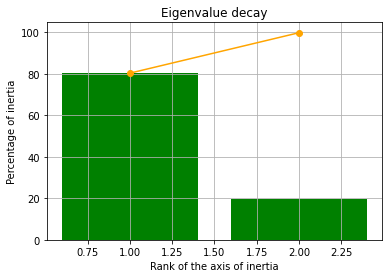

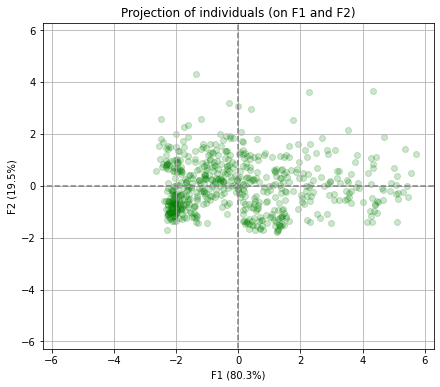

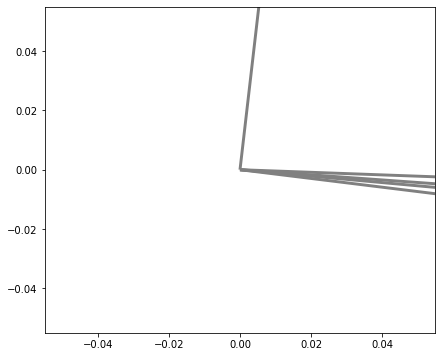

In [131]:
#apply PCA on NVIDIA dataset
from sklearn import decomposition, preprocessing
n_comp = 2
X = Data_PCA.values
X = preprocessing.StandardScaler(with_std=False).fit_transform(X)
pca = decomposition.PCA(n_components= n_comp)
pca.fit(X)
display_scree_plot(pca)
X_projected = pca.transform(X)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(1,2),(0,2)], alpha = 0.2)
features = Data_PCA.columns
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)],labels = np.array(features))

In [132]:
#This line of code applies PCA (Principal Component Analysis) to the input data using the pre-defined PCA object 'pca', and transforms the data into a lower-dimensional space according to the principal components.
Data_PCA = pca.fit_transform(Data_PCA)

In [133]:
Data_PCA = pd.DataFrame(Data_PCA)

In [134]:
Data_PCA

,0,1
0,-1.871298,-0.352006
1,-1.684676,0.129642
2,-1.691485,-0.381645
3,-1.749805,-0.761208
4,-1.862963,-0.803996
...,...,...
594,0.912211,-0.260919
595,0.893889,0.325312
596,2.276342,3.621716
597,1.887442,0.662122


In [135]:
Data_PCA["target"] = Data["target"]

In [136]:
Data_PCA

,0,1,target
0,-1.871298,-0.352006,NaN
1,-1.684676,0.129642,0.0
2,-1.691485,-0.381645,1.0
3,-1.749805,-0.761208,1.0
4,-1.862963,-0.803996,0.0
...,...,...,...
594,0.912211,-0.260919,0.0
595,0.893889,0.325312,0.0
596,2.276342,3.621716,0.0
597,1.887442,0.662122,1.0


In [137]:
#This code creates a new Pandas DataFrame object named "data_fram" with columns named 'p1', 'p2', and 'target'.
data_fram = pd.DataFrame()
data_fram['p1'] = Data_PCA[0]
data_fram['p2'] = Data_PCA[1]
data_fram['target'] = Data_PCA["target"]

In [138]:
#This code is fitting a Generalized Linear Model (GLM) with a binomial family and a logit link function to the first 300 rows of a dataset data_fram using the explanatory variables p1 and p2. 
reg_log1 = smf.glm('target ~ p1+p2', data=data_fram.head(300), family=sm.families.Binomial()).fit()
beta1 = reg_log1.params[0]
beta2 = reg_log1.params[1]
print(reg_log1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 target   No. Observations:                  299
Model:                            GLM   Df Residuals:                      296
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -204.81
Date:                Mon, 27 Feb 2023   Deviance:                       409.63
Time:                        22:24:53   Pearson chi2:                     299.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2072      0.134      1.546      0.1

#Train with PCA

AUC : 0.5312103066594085


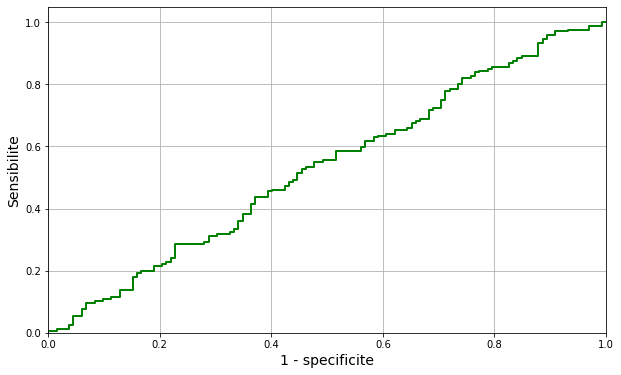

In [139]:
from sklearn import metrics
y_true= Data.head(299)['target']
y_pred_proba= reg_log1.predict()
[fpr, tpr, thr] = metrics.roc_curve(y_true, y_pred_proba)
plt.figure(figsize=(10, 6))
plt.grid(True, which='both')
plt.plot(fpr, tpr, color='green', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - specificite', fontsize=14)
plt.ylabel('Sensibilite', fontsize=14)
print ("AUC :",metrics.auc(fpr, tpr))
plt.show()

In [140]:
y_pred = (y_pred_proba > 0.50).astype(int) #En fait le choix d'un seuil de 0.17,
#on affecte 1 aux probabilités au-dessus
print("la matrice de confusion :", metrics.confusion_matrix(y_true,y_pred))
print("la precision :", metrics.precision_score(y_true, y_pred))
print("le recall :", metrics.recall_score(y_true, y_pred))
print("le f1_score :", metrics.f1_score(y_true, y_pred))
print("l'accuracy :", metrics.accuracy_score(y_true, y_pred))

la matrice de confusion : [[  1 131]
 [  1 166]]
la precision : 0.5589225589225589
le recall : 0.9940119760479041
le f1_score : 0.7155172413793104
l'accuracy : 0.5585284280936454


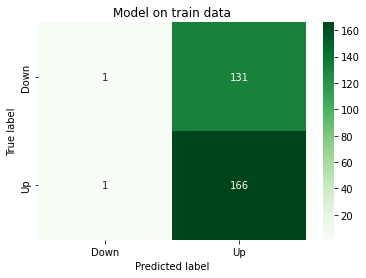

In [141]:
from sklearn.metrics import confusion_matrix
from keras.models import load_model
import seaborn as sns


conf_matrix = confusion_matrix(y_true, y_pred)


sns.heatmap(conf_matrix, annot=True, cmap='Greens', fmt='d', xticklabels=['Down','Up'], yticklabels=['Down','Up'])
plt.title('Model on train data')
plt.xlabel('Predicted label')
plt.ylabel('True label')
#plt.savefig("model_confusion_matrix.png", transparent=True)
plt.show()

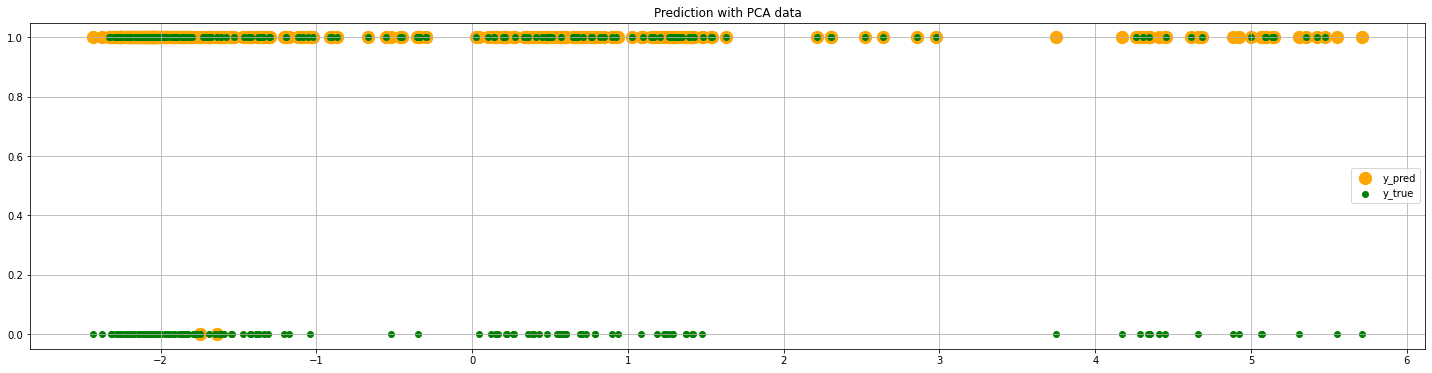

In [142]:
plt.figure(figsize=(25, 6))
plt.grid()
plt.scatter(data_fram.head(299)['p1'], y_pred, color="orange", s=150)
plt.scatter(data_fram.head(299)['p1'], y_true, color="green")
plt.legend(["y_pred", "y_true"])
plt.title("Prediction with PCA data")
plt.savefig('prediction_PCA.png', transparent=True)

# **KNN**

In [143]:
NVIDIA

,open,high,low,close,volume
0,140.750,140.845000,137.58000,138.3875,37890088.0
1,137.670,138.242500,136.60750,137.6275,34689092.0
2,139.895,143.470000,139.12500,142.2600,43474380.0
3,142.965,143.484975,140.18625,142.4825,34460312.0
4,142.905,143.427500,139.60000,140.9525,27664712.0
...,...,...,...,...,...
595,210.000,214.938000,206.18000,206.5500,41001455.0
596,207.070,211.040000,204.21000,207.5400,51318432.0
597,234.400,238.880000,230.25000,236.6400,111799541.0
598,232.250,234.740000,229.47000,232.8600,58971591.0


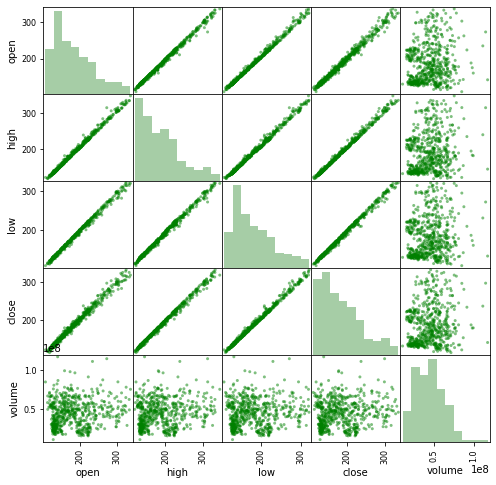

In [144]:
#this code creates a scatter matrix plot of the NVIDIA dataset using the scatter_matrix function from pandas.plotting library.
from pandas.plotting import scatter_matrix
fig = scatter_matrix(NVIDIA, diagonal='hist', figsize=(8,8), grid=True, color = "green", hist_kwds={'color': (0.42, 0.678, 0.42, 0.6)})
plt.savefig('matrice.png', transparent=True)
plt.show()

In [145]:
mostach = Data.drop('target', axis=1)

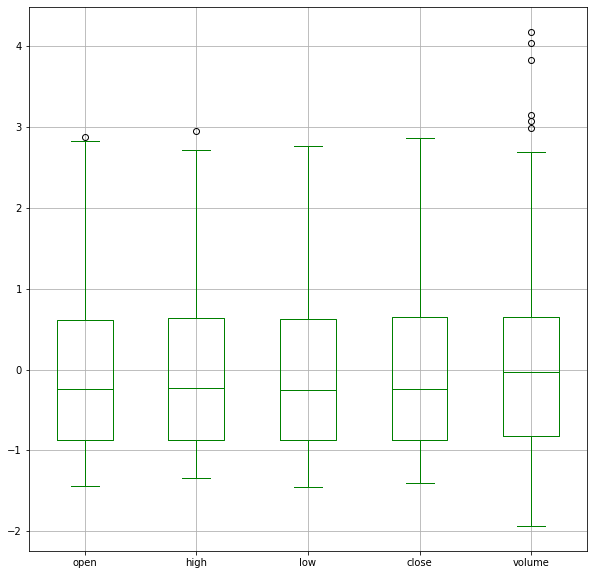

In [146]:
#This code generates a boxplot for a DataFrame named mostach. 
boxplot = mostach.boxplot(figsize=(10,10), color="green")
plt.savefig('mostash.png', transparent=True)
plt.show()

In [148]:
target = pd.DataFrame({'target': Data["target"]})
data = Data.drop('target', axis=1)

In [158]:
#This code imports the train_test_split function from sklearn.model_selection, which is used to split data and target variables into training and testing sets with a 80:20 ratio. 
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(data, target, train_size=0.8)

In [159]:
#This code uses scikit-learn's KNeighborsClassifier algorithm to create a classifier object called knn with n_neighbors set to 26, indicating that it will use the 26 nearest neighbors to make predictions. 
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=26)
knn.fit(xtrain, ytrain)

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=26)

In [160]:
#print error of the KNN model
error = 1 - knn.score(xtest, ytest)
print('Erreur: %f' % error)

Erreur: 0.516667


/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

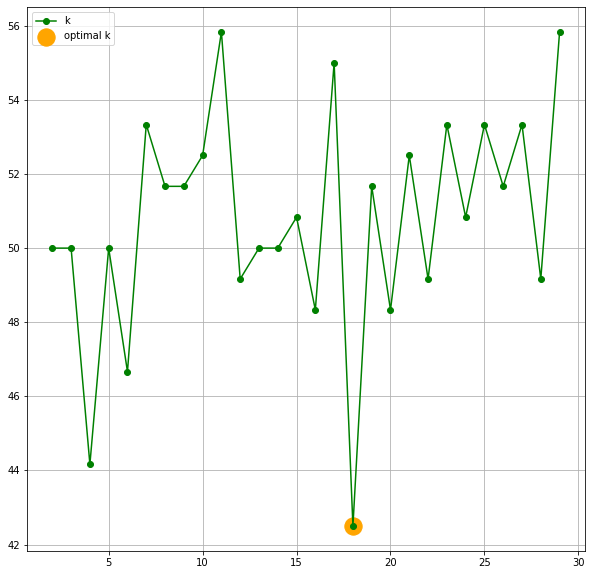

In [161]:
#This code trains a k-nearest neighbors (KNN) classifier on a training dataset, and evaluates its performance on a test dataset for a range of values of the hyperparameter k. 
errors = []
for k in range(2,30):
  knn = neighbors.KNeighborsClassifier(k)
  errors.append(100*(1 - knn.fit(xtrain, ytrain).score(xtest, ytest)))
plt.figure(figsize=(10, 10))
plt.plot(range(2,30), errors, 'o-', color='green')
plt.scatter(x=errors.index(min(errors))+2, y=min(errors), color="orange", s=300)
plt.legend(["k", "optimal k"])
plt.grid(True, which='both')
plt.savefig('knn.png', transparent=True)
plt.show()

In [162]:
#These two lines of code are creating and fitting a K-Nearest Neighbors (KNN) classifier model on the training data (xtrain and ytrain).
knn = neighbors.KNeighborsClassifier(errors.index(min(errors))+2)
knn.fit(xtrain, ytrain).score(xtest, ytest)

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.575

In [163]:
#This code line uses a k-nearest neighbors (KNN) classifier to predict the class labels of a set of test samples (xtest),
y_pred = knn.predict(xtest)

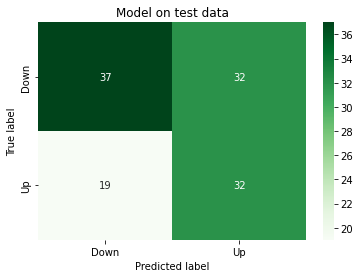

In [164]:
#This code creates a confusion matrix to evaluate the performance of a classification model on a set of test data. 
from sklearn.metrics import confusion_matrix
from keras.models import load_model
import seaborn as sns


conf_matrix = confusion_matrix(ytest, y_pred)


sns.heatmap(conf_matrix, annot=True, cmap='Greens', fmt='d', xticklabels=['Down','Up'], yticklabels=['Down','Up'])
plt.title('Model on test data')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.savefig("model_confusion_matrix_knn.png", transparent=True)
plt.show()

In [165]:
xtest

,open,high,low,close,volume
336,1.120799,1.184262,1.163401,1.268229,-0.169309
51,-1.041184,-1.031839,-1.019137,-0.997804,-0.779407
435,-0.691670,-0.715510,-0.736819,-0.768665,0.775272
186,0.449170,0.370508,0.440424,0.356822,-0.123740
502,-1.013355,-0.978398,-0.992282,-1.036723,1.151106
...,...,...,...,...,...
402,-0.329751,-0.180073,-0.300707,-0.156154,1.299524
430,-0.384930,-0.327395,-0.356695,-0.267764,0.179684
152,-0.812757,-0.838584,-0.813715,-0.866276,-1.434976
576,0.060907,0.112648,0.140755,0.143848,0.315518


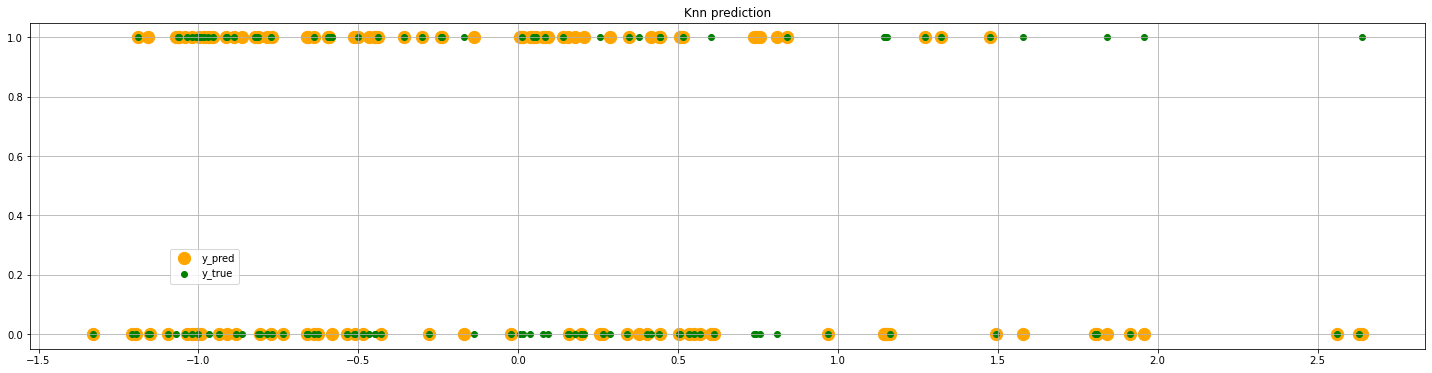

In [166]:
#This code creates a scatter plot to visualize the predictions of a KNN classifier on a set of test data. 
plt.figure(figsize=(25, 6))
plt.grid()
plt.scatter(xtest['low'], y_pred, color="orange", s=150)
plt.scatter(xtest['low'], ytest, color="green")
plt.legend(["y_pred", "y_true"], loc=(0.1, 0.2))
plt.title("Knn prediction")
plt.savefig('knn_pred.png', transparent=True)